In [116]:
from datetime import datetime
import pandas as pd
import numpy as np

In [125]:
df = pd.read_csv('data/실거래_아파트_서울특별시_2020.csv',
                 encoding='CP949', header=15, 
                 parse_dates=['해제사유발생일'],
                 dtype={"거래금액": np.int64}
                 )
df.rename(columns={'거래금액(만원)': '거래금액', "전용면적(㎡)": "전용면적"},
          inplace=True)
df['거래금액'] = df.거래금액.apply(lambda x: x.replace(",", ""))
df.거래금액 = df.거래금액.astype(np.int64)
df['계약날짜'] = df.apply(lambda x: datetime.strptime("%s%s" % (x.계약년월, x.계약일), "%Y%m%d") , axis=1)

In [152]:
pd.set_option("display.max_columns", None)
df.head()

,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지,계약날짜
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202006,23,149500,4,1988,언주로 103,NaT,-,-,2020-06-23
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,54.98,202002,24,144000,4,1987,언주로 3,NaT,-,-,2020-02-24
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202006,18,162750,4,1987,언주로 3,NaT,-,-,2020-06-18
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202006,20,160000,5,1987,언주로 3,NaT,-,-,2020-06-20
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202006,22,150000,2,1987,언주로 3,NaT,-,-,2020-06-22


In [121]:
df

,시군구,번지,본번,부번,단지명,전용면적,계약년월,계약일,거래금액,층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),77.75,202006,23,149500,4,1988,언주로 103,NaT,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,54.98,202002,24,144000,4,1987,언주로 3,NaT,-,-
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202006,18,162750,4,1987,언주로 3,NaT,-,-
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202006,20,160000,5,1987,언주로 3,NaT,-,-
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202006,22,150000,2,1987,언주로 3,NaT,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84129,서울특별시 중랑구 중화동,274-77,274.0,77.0,한영(104),67.57,202008,7,26000,2,2003,동일로144길 74,NaT,-,-
84130,서울특별시 중랑구 중화동,11,11.0,0.0,현대휴앤미,95.94,202007,10,44000,6,2007,봉화산로27가길 23,NaT,-,-
84131,서울특별시 중랑구 중화동,11,11.0,0.0,현대휴앤미,100.17,202012,3,54800,5,2007,봉화산로27가길 23,NaT,-,-
84132,서울특별시 중랑구 중화동,11-7,11.0,7.0,현대휴앤미(102동),77.71,202009,28,40000,5,2007,봉화산로27가길 19,2020-10-27,-,-


<AxesSubplot:xlabel='계약년월'>

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


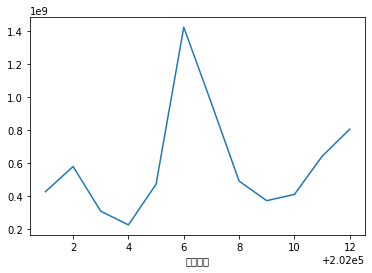

In [147]:
df.groupby(by=[df['계약년월']]).sum().거래금액.plot()

<AxesSubplot:xlabel='계약년월'>

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


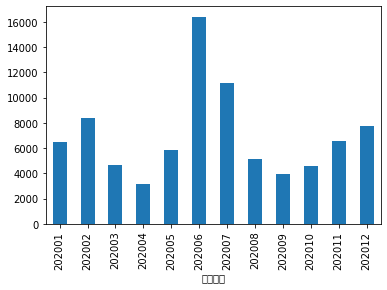

In [150]:
df.groupby(by=[df['계약년월']]).count().거래금액.plot.bar()

In [135]:
pd.to_datetime(df.계약날짜[0]).dt.to_period('M')

AttributeError: 'Timestamp' object has no attribute 'dt'

In [133]:
df.계약날짜[0].dt

AttributeError: 'Timestamp' object has no attribute 'dt'